In [153]:
import numpy as np
import pandas as pd

from fbprophet import Prophet

import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
#plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 14
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16

### Import donations data

In [155]:
don_data = pd.read_csv("data/donations.csv")

In [156]:
don_data.columns = ['datestring', 'contribution', 'frequency', 'resource', 'personalID', 'company']
don_data["ds"] = pd.to_datetime(don_data.datestring)
#donations_data.set_index('ds', inplace=True)

In [157]:
don_data.tail()

,datestring,contribution,frequency,resource,personalID,company,ds
32219,2017-12-29,5.00,monthly,Spendenformular,2070368,0,2017-12-29
32220,2017-12-29,2.75,monthly,Spendenformular,2071041,0,2017-12-29
32221,2017-12-29,193.00,once,Spendenformular,2069663,0,2017-12-29
32222,2017-12-29,25.00,once,Dauerspende,286521,0,2017-12-29
32223,2017-12-29,50.00,once,Spendenformular,408832,0,2017-12-29


In [158]:
don = pd.DataFrame(don_data.groupby(["ds"])["contribution"].sum())
don.reset_index(level=0, inplace=True)
don.columns = ["ds", "y"]
don.tail()

,ds,y
767,2017-12-21,8517.22
768,2017-12-22,13339.75
769,2017-12-27,36840.06
770,2017-12-28,14033.75
771,2017-12-29,34677.13


### Decompose donations into trend & seasonal fluctuation

In [159]:
don_prophet = Prophet(weekly_seasonality=False, daily_seasonality=False, changepoint_prior_scale=0.05)
don_prophet.fit(don)

/Users/Frederik/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [160]:
future = don_prophet.make_future_dataframe(periods=365)
don_forecast = don_prophet.predict(future)

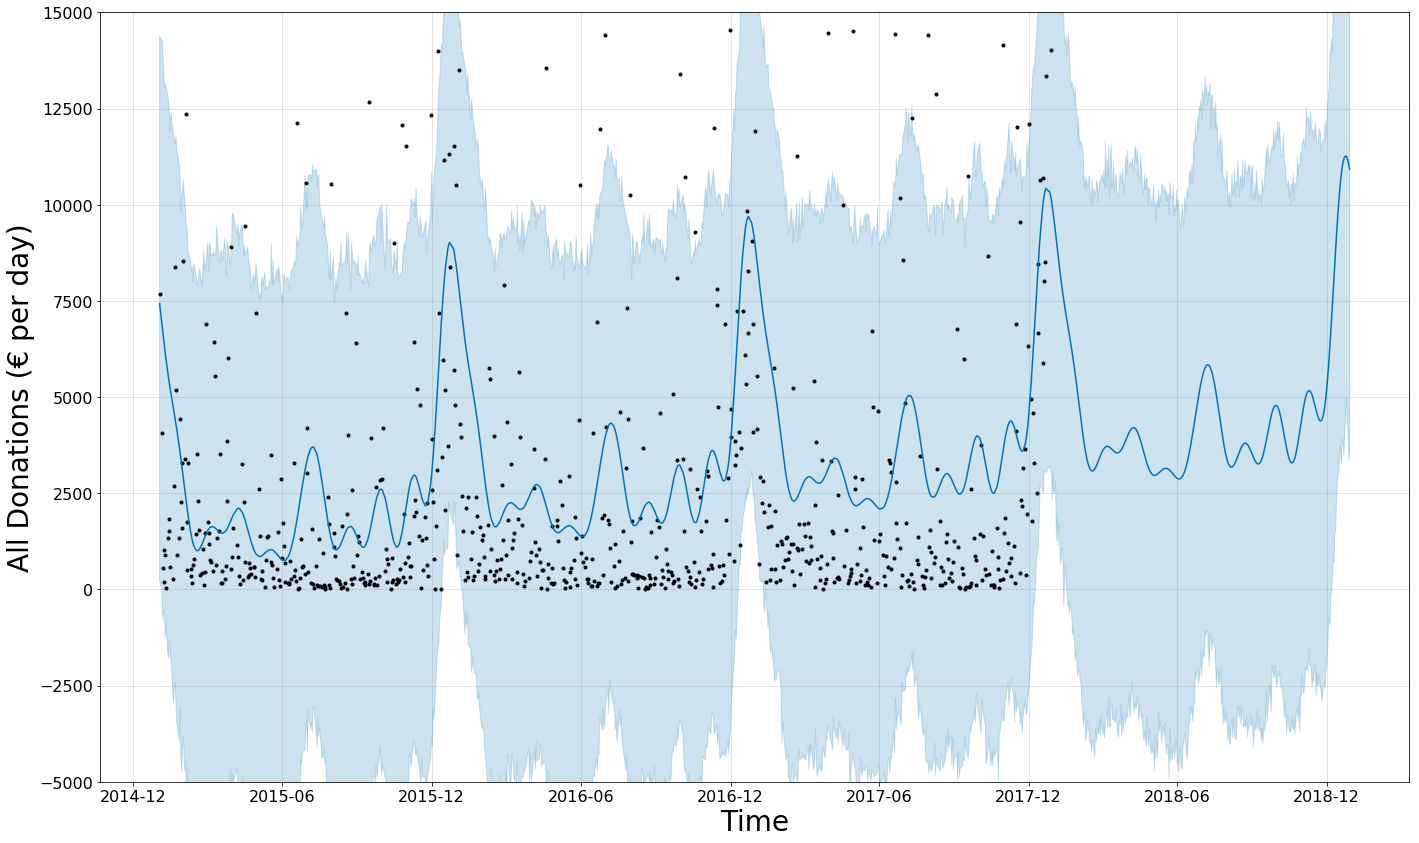

In [176]:
axes = plt.gca()
axes.set_ylim([-5000, 15000])
don_prophet.plot(don_forecast, xlabel="Time", ylabel="All Donations (€ per day)", ax=axes);

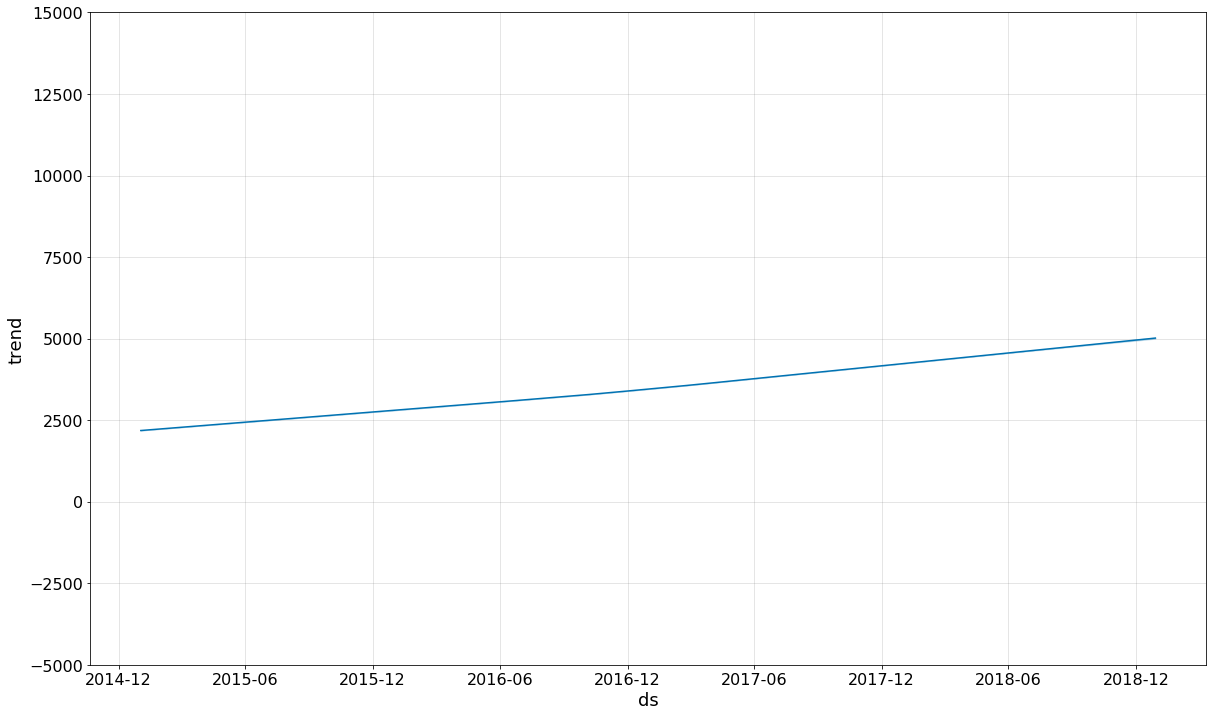

In [162]:
axes = plt.gca()
axes.set_ylim([-5000, 15000])
don_prophet.plot_forecast_component(don_forecast, "trend", ax=axes);

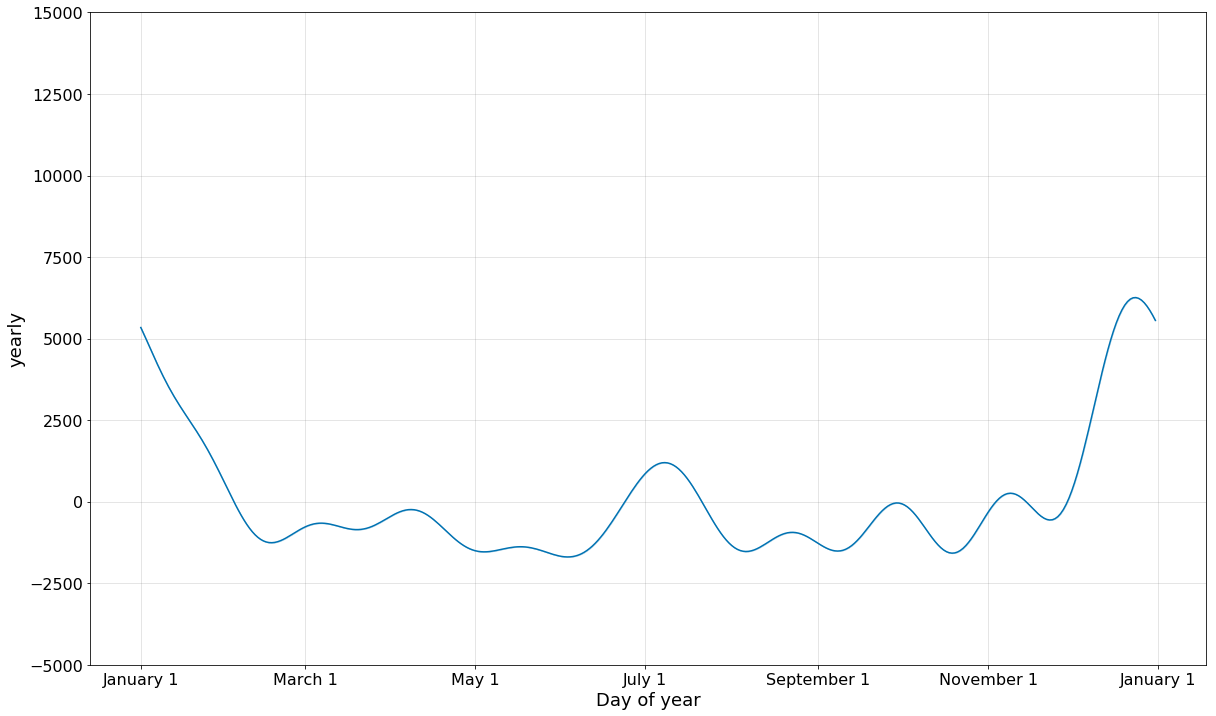

In [163]:
axes = plt.gca()
axes.set_ylim([-5000, 15000])
don_prophet.plot_yearly(ax=axes);

### Look at private donors only

In [164]:
don_priv = pd.DataFrame(don_data.query("company==0").groupby(["ds"])["contribution"].sum())
don_priv.reset_index(level=0, inplace=True)
don_priv.columns = ["ds", "y"]
don_priv.tail()

,ds,y
752,2017-12-21,2467.22
753,2017-12-22,5939.25
754,2017-12-27,20440.06
755,2017-12-28,11829.75
756,2017-12-29,5741.75


In [165]:
don_priv_prophet = Prophet(weekly_seasonality=False, daily_seasonality=False, changepoint_prior_scale=0.05)
don_priv_prophet.fit(don_priv)
future = don_priv_prophet.make_future_dataframe(periods=365)
don_priv_forecast = don_priv_prophet.predict(future)

/Users/Frederik/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


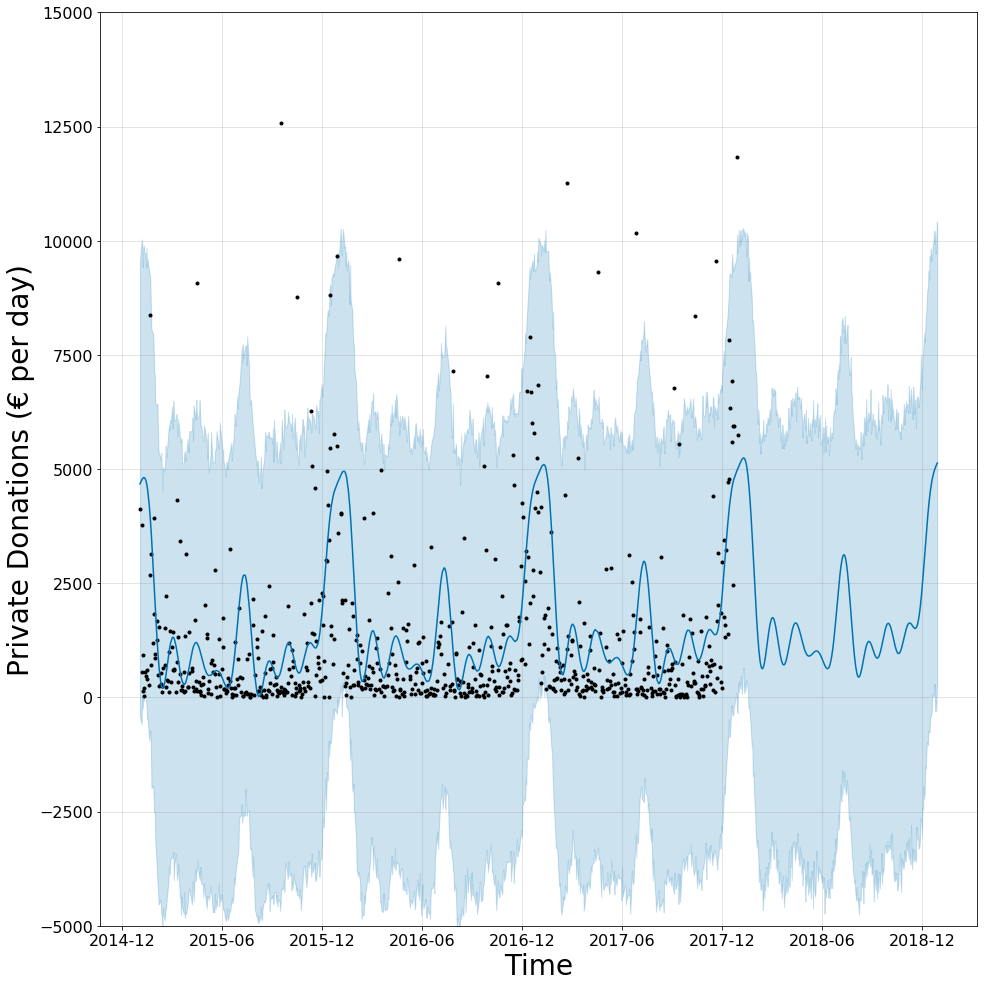

In [193]:
axes = plt.gca()
axes.set_ylim([-5000, 15000])
don_priv_prophet.plot(don_priv_forecast, xlabel="Time", ylabel="Private Donations (€ per day)", ax=axes);

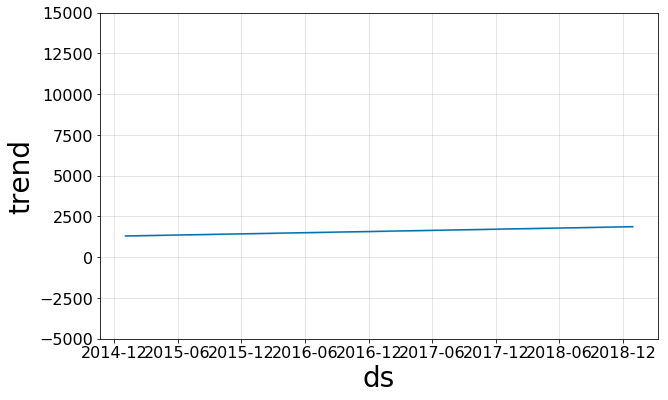

In [188]:
axes = plt.gca()
axes.set_ylim([-5000, 15000])
don_priv_prophet.plot_forecast_component(don_priv_forecast, "trend", ax=axes);

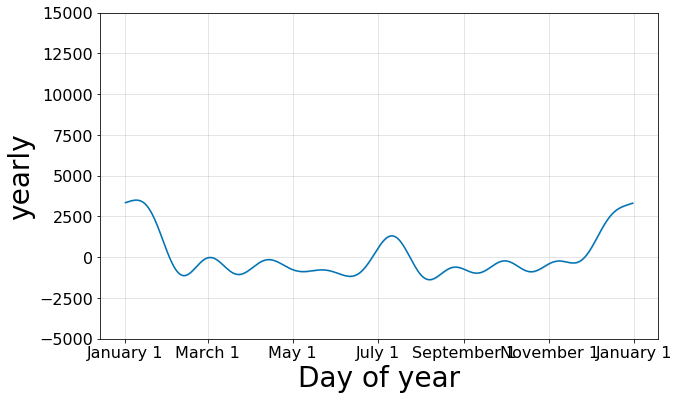

In [189]:
axes = plt.gca()
axes.set_ylim([-5000, 15000])
don_priv_prophet.plot_yearly(ax=axes);

### Now the companies

In [168]:
don_com = pd.DataFrame(don_data.query("company!=0").groupby(["ds"])["contribution"].sum())
don_com.reset_index(level=0, inplace=True)
don_com.columns = ["ds", "y"]
don_com.tail()

,ds,y
580,2017-12-21,6050.00
581,2017-12-22,7400.50
582,2017-12-27,16400.00
583,2017-12-28,2204.00
584,2017-12-29,28935.38


In [169]:
don_com_prophet = Prophet(weekly_seasonality=False, daily_seasonality=False, changepoint_prior_scale=0.05)
don_com_prophet.fit(don_com)
future = don_com_prophet.make_future_dataframe(periods=365)
don_com_forecast = don_com_prophet.predict(future)

/Users/Frederik/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


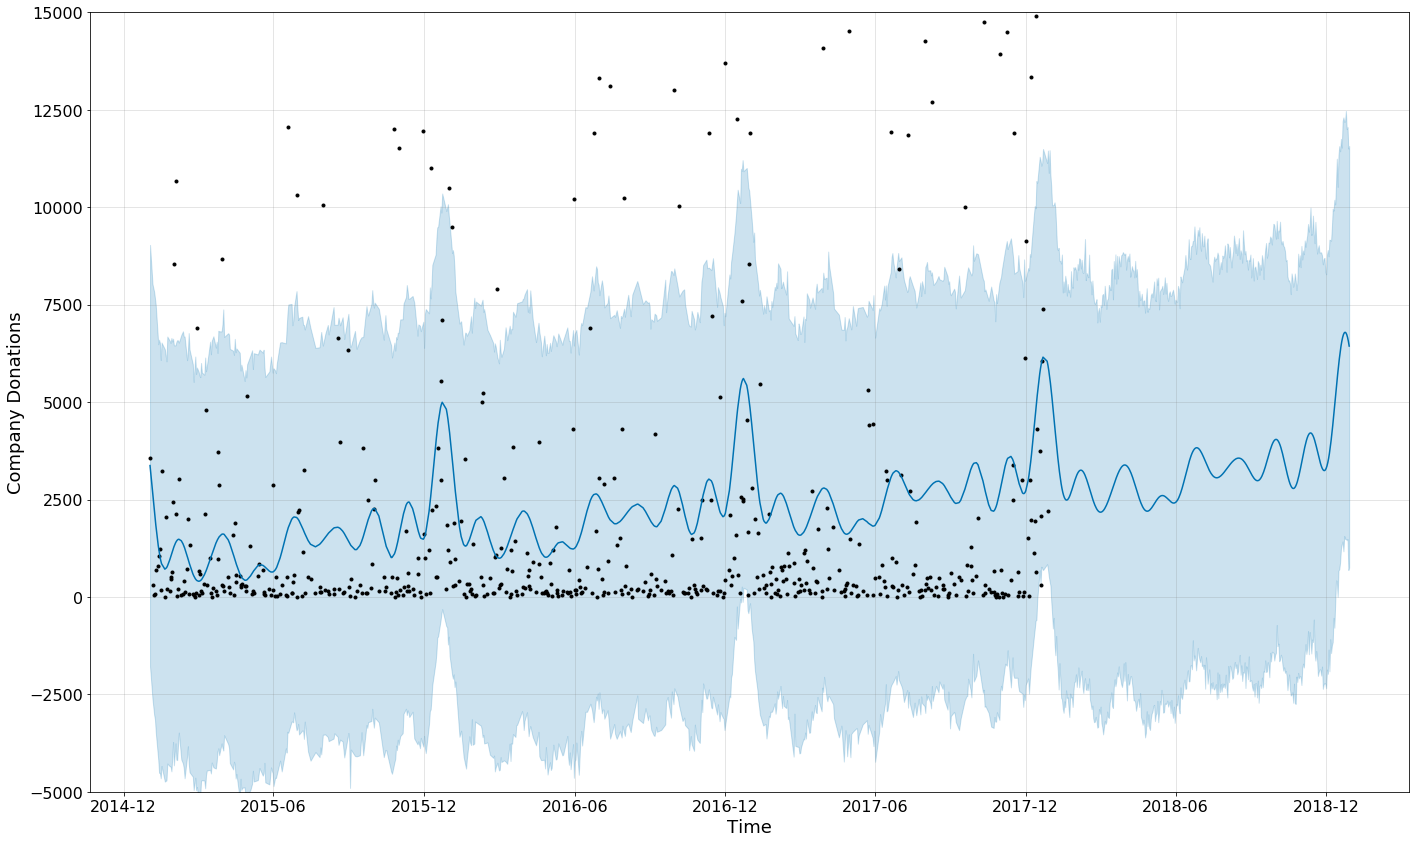

In [170]:
axes = plt.gca()
axes.set_ylim([-5000, 15000])
don_com_prophet.plot(don_com_forecast, xlabel="Time", ylabel="Company Donations", ax=axes);

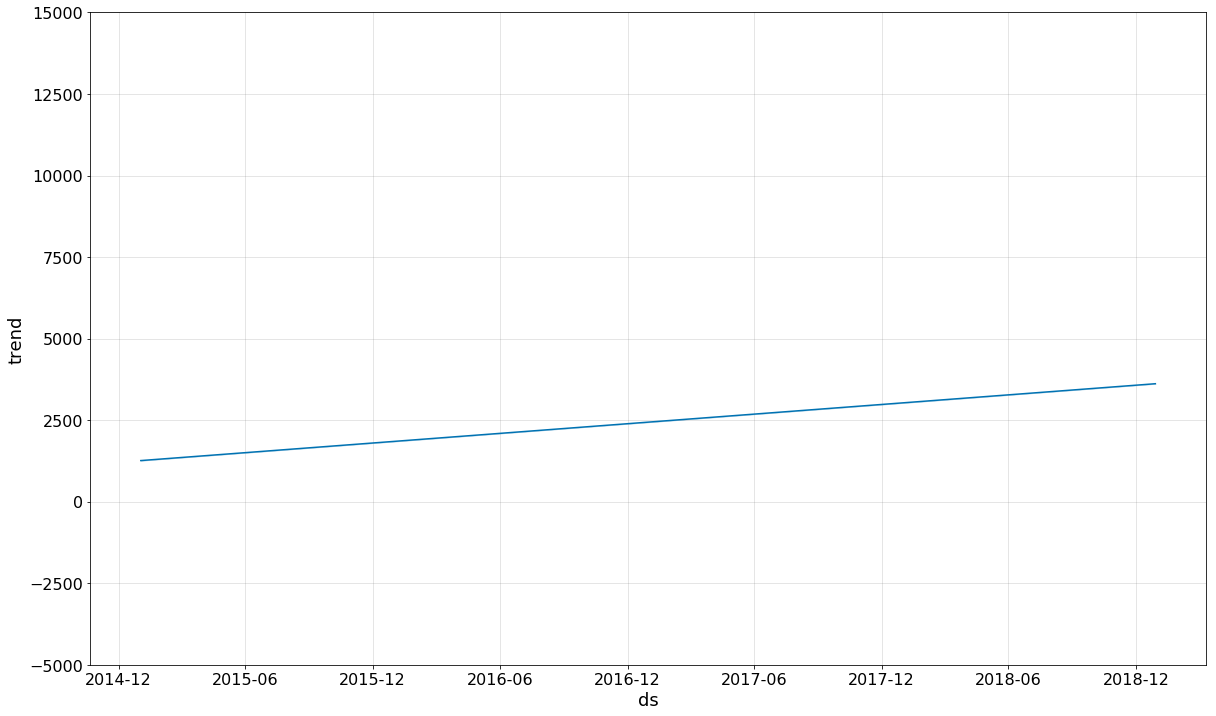

In [171]:
axes = plt.gca()
axes.set_ylim([-5000, 15000])
don_com_prophet.plot_forecast_component(don_com_forecast, "trend", ax=axes);